In [1]:
import os

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io

from helpers.cell_type_naming import weird_to_nice

plotly.io.renderers.default = "jupyterlab+png"

In [2]:
bulk_mixtures = pd.read_csv(
    "gs://liulab/csx_experiments/varying_parameters/with_bmode/CIBERSORTx_Mixtures_Adjusted.txt",
    sep="\t",
    index_col=0,
).sort_index()

bulk_mixtures

,53,58,59,60,65,67,71,72,74,75,78,79,80,81,82,84,88,89,94
GeneSymbol,,,,,,,,,,,,,,,,,,,
A2M,643.953389,36.098304,353.269070,32.839094,154.009706,24.252850,98.152740,22.908134,8.229174,109.599219,119.789308,3125.599749,311.130346,1928.368797,1483.083604,342.306394,762.570118,174.165678,524.112290
A4GALT,29.883909,0.817221,16.260259,12.640825,0.817221,0.817221,0.817221,5.201922,0.817221,1.020385,0.817221,3.339776,23.179590,6.711571,13.029001,18.581975,6.091738,0.817221,28.773910
AARSD1,33.022275,63.771947,110.428640,38.198756,7.814694,45.933417,128.418625,59.460079,79.492752,117.218291,77.952777,74.882568,54.673065,76.481371,39.228743,41.999462,84.928884,47.746137,88.135076
ABCA1,10.597622,3.385264,20.349724,52.239534,31.295893,34.302877,17.917060,29.298171,8.400736,6.234283,12.892899,18.858383,50.904092,53.134500,26.700897,104.279758,58.466334,37.742521,54.071240
ABCB5,30.005150,57.127829,1010.550492,47.852595,110.450394,255.532907,22.658911,42.634074,26.587302,122.203810,15.462197,257.824496,31.762818,19.327988,13.889246,93.271408,348.689395,92.459818,39.844709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZRSR2,96.291338,63.400499,21.518885,79.114494,16.834031,38.626805,23.808583,141.727577,21.067710,50.005783,30.562646,34.104627,57.109811,37.591445,18.965339,67.197846,67.608300,38.092448,133.172319
ZSCAN12,21.030440,90.672797,19.385638,29.516790,7.912951,129.271550,47.627822,23.936430,66.413574,59.379149,23.272176,34.139025,40.575151,63.740181,33.547414,35.933642,26.241253,35.621124,22.458859
ZSCAN16,20.284521,14.686227,7.960586,144.650512,27.451952,47.732685,18.012114,33.159163,95.656548,69.586320,27.343887,35.484143,42.318578,32.360107,69.673408,123.806486,69.391479,44.214095,44.013905


In [3]:
path = "gs://liulab/csx_experiments/imputation/out/CIBERSORTxGEP_NA_Fractions.txt"

fractions_sample_by_cell = pd.read_csv(
    path,
    sep="\t",
    index_col=0,
).rename(columns=weird_to_nice)

fractions_sample_by_cell

,Malignant,Endothelial,CAF,T CD8,NK,Macrophage,T CD4,B,P-value,Correlation,RMSE
Mixture,,,,,,,,,,,
53,0.047628,0.030876,0.056403,0.299805,0.138433,0.082886,0.343968,0.000000,9999.0,0.913267,0.624717
58,0.000000,0.000000,0.003011,0.640688,0.070722,0.021656,0.247513,0.016409,9999.0,0.968085,0.540777
59,0.653620,0.000000,0.305489,0.000000,0.001245,0.037547,0.002100,0.000000,9999.0,0.814022,0.711394
60,0.034159,0.000379,0.000000,0.232051,0.081723,0.051040,0.203930,0.396718,9999.0,0.925933,0.456468
65,0.085071,0.000728,0.000000,0.317211,0.021196,0.033165,0.459450,0.083178,9999.0,0.925506,0.631160
67,0.000000,0.000000,0.000000,0.273097,0.038581,0.005893,0.497270,0.185159,9999.0,0.918715,0.597983
71,0.443202,0.000643,0.002281,0.312400,0.033853,0.039054,0.166721,0.001847,9999.0,0.852312,0.714290
72,0.000000,0.000000,0.001024,0.000000,0.016005,0.012660,0.727604,0.242708,9999.0,0.867485,0.630013
74,0.000000,0.000572,0.002459,0.663043,0.039448,0.049028,0.179806,0.065645,9999.0,0.964792,0.524764


In [4]:
fractions_sample_by_cell[["B", "T CD4", "Malignant"]].sum(axis=1).sort_values()

Mixture
75    0.223837
74    0.245450
58    0.263922
53    0.391597
84    0.570930
89    0.579215
71    0.611769
65    0.627699
60    0.634807
82    0.638865
59    0.655719
81    0.657640
88    0.670494
67    0.682429
80    0.690237
79    0.723878
94    0.812271
72    0.970312
78    0.996330
dtype: float64

In [5]:
path = "gs://liulab/csx_experiments/imputation/out/CIBERSORTxGEP_NA_GEPs.txt"

geps_by_cell = pd.read_csv(
    path,
    sep="\t",
    index_col=0,
    #     nrows=10
).rename(columns=weird_to_nice)

geps_by_cell

,Malignant,Endothelial,CAF,T CD8,NK,Macrophage,T CD4,B
GeneSymbol,,,,,,,,
A2M,1120.245375,5751.783671,0.000000,235.775811,0.000000,359.418106,35.620034,0.000000
A4GALT,0.000000,315.372260,53.707693,0.000000,67.987100,35.012948,0.000000,2.816020
AARSD1,89.134108,265.496800,123.957180,93.879877,0.000000,0.000000,28.016850,48.531340
ABCA1,19.818101,162.111866,0.000000,0.000000,0.000000,285.107554,19.687429,100.075174
ABCB5,66.632437,0.000000,2595.800449,49.308332,0.000000,451.383477,0.000000,89.964347
...,...,...,...,...,...,...,...,...
ZRSR2,16.249371,474.110762,8.352578,0.000000,206.309890,67.343270,92.801067,102.123751
ZSCAN12,20.340824,0.000000,4.920740,92.811757,0.000000,0.000000,43.970393,18.951009
ZSCAN16,15.482489,0.000000,0.000000,53.022847,2.133900,330.200419,0.000000,198.438315


In [6]:
!gsutil ls gs://liulab/csx_experiments/imputation/out/CIBERSORTxHiRes*txt

gs://liulab/csx_experiments/imputation/out/CIBERSORTxHiRes_NA_Bcells_Window10.txt
gs://liulab/csx_experiments/imputation/out/CIBERSORTxHiRes_NA_CAF_Window10.txt
gs://liulab/csx_experiments/imputation/out/CIBERSORTxHiRes_NA_Endothelialcells_Window10.txt
gs://liulab/csx_experiments/imputation/out/CIBERSORTxHiRes_NA_Macrophages_Window10.txt
gs://liulab/csx_experiments/imputation/out/CIBERSORTxHiRes_NA_Malignant_Window10.txt
gs://liulab/csx_experiments/imputation/out/CIBERSORTxHiRes_NA_NKcells_Window10.txt
gs://liulab/csx_experiments/imputation/out/CIBERSORTxHiRes_NA_TcellsCD4_Window10.txt
gs://liulab/csx_experiments/imputation/out/CIBERSORTxHiRes_NA_TcellsCD8_Window10.txt


In [7]:
path = (
    "gs://liulab/csx_experiments/imputation/out/CIBERSORTxHiRes_NA_Bcells_Window10.txt"
)

geps_by_sample_b = pd.read_csv(
    path,
    sep="\t",
    index_col=0,
    #     nrows=10
).sort_index()

geps_by_sample_b

,53,58,59,60,65,67,71,72,74,75,78,79,80,81,82,84,88,89,94
GeneSymbol,,,,,,,,,,,,,,,,,,,
ABHD13,163.278391,225.360913,211.809203,141.282254,173.850027,181.368639,203.364776,151.853890,219.890665,164.486521,212.402163,186.482658,189.813066,204.799898,224.253826,190.406026,202.257689,182.803761,197.894528
ADAM19,801.814497,628.044896,573.061394,812.981309,617.070774,821.329517,632.785156,805.444094,817.528879,627.464184,443.493863,636.585795,813.906659,620.700371,629.162936,812.788619,628.237586,812.207906,757.805117
ADAM28,2339.864517,1946.763695,2175.020182,1991.778809,2213.023481,2228.007127,2215.493588,2357.193862,2410.348385,1834.906305,2289.293175,2063.162792,2177.435785,2469.051252,2207.668906,2101.166092,2103.636198,2298.490995,2095.811517
ADK,343.325801,392.691339,345.727635,355.305248,336.150023,356.239874,362.615845,351.357719,402.268952,341.780107,352.064690,342.487077,357.747328,351.215056,353.038233,348.169716,346.662261,360.792669,352.903413
AFF3,289.447955,216.985568,329.098462,274.380977,239.942620,281.356952,195.079963,279.593127,234.730470,264.076128,248.612954,304.156277,288.263461,220.406723,264.505770,303.726635,241.706445,256.636075,260.057230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF318,232.248299,222.639708,218.606802,220.240598,221.837427,215.441550,212.173957,213.820109,213.789013,213.807754,213.527340,215.161136,224.273504,220.203631,233.882096,212.186313,209.540756,215.422809,211.174552
ZNF345,131.818903,129.445062,74.406452,226.008543,168.596092,193.888000,114.380594,113.364117,77.126665,171.793045,136.475549,134.539116,170.776568,96.606149,79.063098,205.664061,154.018600,148.251610,186.857513
ZNF441,229.690502,215.040518,236.117339,233.680507,242.739043,210.449007,220.437099,217.070712,236.312206,231.903510,246.243572,255.254400,261.876104,227.058803,225.281805,278.182246,271.560541,221.662222,252.865277


In [8]:
path = "gs://liulab/csx_experiments/imputation/out/CIBERSORTxHiRes_NA_TcellsCD4_Window10.txt"

geps_by_sample_t_cd4 = pd.read_csv(
    path,
    sep="\t",
    index_col=0,
    #     nrows=10
).sort_index()

geps_by_sample_t_cd4

,53,58,59,60,65,67,71,72,74,75,78,79,80,81,82,84,88,89,94
GeneSymbol,,,,,,,,,,,,,,,,,,,
ABCC10,130.657474,137.781274,21.937931,31.038797,148.745315,80.791190,33.508483,47.068912,123.723395,112.227920,53.374661,89.892056,92.361742,105.922171,71.804215,64.870136,43.041502,78.928015,101.894761
AKNA,476.920003,490.567110,450.739230,465.136258,475.260067,478.085354,462.169681,479.769439,476.564872,478.226644,463.474485,463.829617,476.672355,461.689659,463.581968,474.780046,464.994968,466.679053,477.476723
ALKBH6,274.803458,273.866409,165.496022,209.399159,182.528593,257.166342,275.321938,322.570640,232.892982,209.917640,208.462110,167.662677,260.179027,194.774728,167.488683,296.304620,233.066976,230.900321,247.932892
AMBRA1,112.783458,109.878145,117.706453,105.374576,114.680109,112.351860,104.245219,112.084911,112.368413,107.581504,110.161647,114.990224,110.145094,112.473342,119.913219,114.575180,105.374738,106.451985,103.167810
ANXA2R,365.512051,377.430113,369.756975,384.707325,388.290141,374.902073,381.843270,369.771130,372.621030,385.426086,371.702004,371.477535,374.341589,374.566059,386.668651,368.376106,366.907075,372.038018,389.532706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VAMP8,2323.262599,2106.298625,876.025339,1876.287393,2103.611303,1255.717775,921.040540,1644.659170,1979.336405,1849.743057,1126.124427,1382.679995,1379.992673,1599.643969,1507.150173,2230.768803,1663.570344,1152.668763,939.951714
VEGFB,51.840669,20.653932,50.762848,38.385570,56.314868,56.613830,39.463390,34.664604,31.560311,42.287844,54.665122,44.236552,40.829109,53.851973,53.206388,47.041882,43.937589,41.474694,33.031210
YPEL2,29.375470,20.424107,19.523400,22.861933,21.924030,25.311264,24.180708,25.487231,20.829923,28.068947,20.248887,21.555410,19.402083,22.154900,20.617508,20.708606,24.004742,20.848377,21.730630


In [9]:
path = "gs://liulab/csx_experiments/imputation/out/CIBERSORTxHiRes_NA_Malignant_Window10.txt"

geps_by_sample_malignant = pd.read_csv(
    path,
    sep="\t",
    index_col=0,
    #     nrows=10
).sort_index()

geps_by_sample_malignant

,53,58,59,60,65,67,71,72,74,75,78,79,80,81,82,84,88,89,94
GeneSymbol,,,,,,,,,,,,,,,,,,,
A2M,2424.447439,272.941230,2565.387712,187.979322,1608.652158,24.863943,47.039049,209.865942,1.000000,655.762670,443.011199,4711.437699,2587.274332,3986.060548,2820.419589,2402.272333,3033.171060,2334.029309,2650.349619
AARSD1,83.318948,121.354454,188.404320,85.949979,69.614840,91.457939,173.094068,128.526912,121.249377,180.266526,124.421097,135.058562,136.664706,137.689593,72.681483,69.509763,143.197553,62.030041,113.769655
ABCB6,140.931171,126.476931,123.418585,124.377017,121.739337,104.611838,141.504516,106.291085,127.176285,123.803671,142.651165,144.303785,141.104124,143.604431,138.866837,125.523666,141.745915,124.618415,123.976625
ABCC5,146.029360,112.132469,148.341881,132.287336,132.567933,121.279484,135.573883,147.687470,110.824008,139.783926,160.323759,131.258669,123.592006,172.437346,106.508794,157.317808,136.882345,115.034051,157.037211
ABHD12,174.193413,174.360629,185.835907,195.630914,170.862414,212.602199,176.395179,216.400312,185.668692,224.077478,219.162800,207.106193,188.459642,182.337692,193.812971,227.875591,199.934920,207.687521,164.919901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF584,48.812646,39.742688,70.535855,32.137247,46.991249,44.849214,65.238237,29.757809,49.407037,53.809485,61.253896,33.420462,40.864873,28.423623,60.131711,50.146832,67.380272,52.526270,29.018014
ZNF593,354.633210,297.334542,340.991546,255.845570,248.403236,391.671801,343.153765,334.373133,285.855097,279.312436,336.081247,278.782579,305.701904,326.720493,283.692878,221.483911,336.611104,313.144238,269.421826
ZNF674.AS1,110.707623,108.998268,100.654362,107.766013,99.265706,109.928204,111.657889,112.486984,101.501721,123.116774,99.772036,109.421874,120.863791,110.810529,97.609846,119.578041,112.960607,98.842101,102.330817


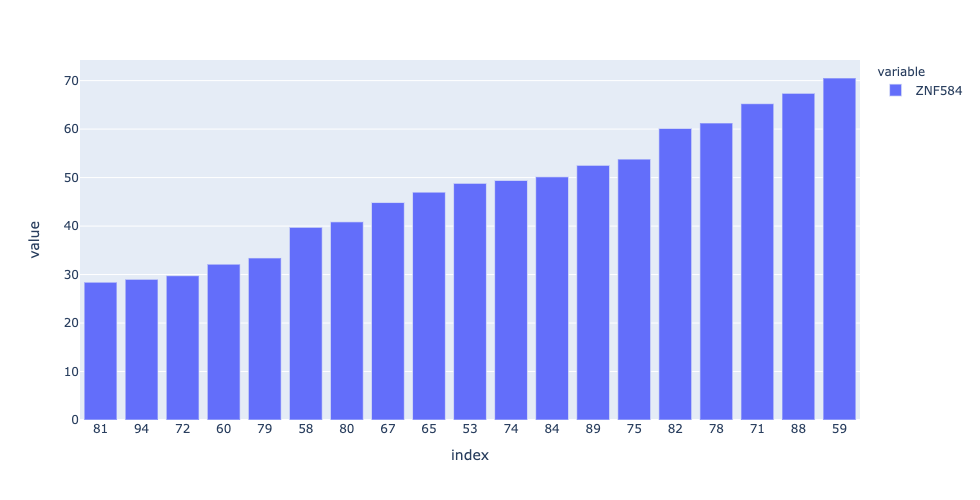

In [10]:
px.bar(geps_by_sample_malignant.loc["ZNF584"].sort_values())

In [11]:
shared_genes = [
    g
    for g in geps_by_sample_malignant.index
    if g in geps_by_sample_t_cd4.index and g in geps_by_sample_b.index
]

shared_genes

['CHCHD7', 'KLF3']

### bulk expression values

In [12]:
geps_by_cell.loc[shared_genes][["B", "T CD4", "Malignant"]]

,B,T CD4,Malignant
GeneSymbol,,,
CHCHD7,300.224831,169.521022,87.056366
KLF3,50.921946,79.118186,20.746613


### fractions (estimated by cibersortx)

In [13]:
fractions_sample_by_cell.T.loc[["B", "T CD4", "Malignant"]]

Mixture,53,58,59,60,65,67,71,72,74,75,78,79,80,81,82,84,88,89,94
B,0.000000,0.016409,0.00000,0.396718,0.083178,0.185159,0.001847,0.242708,0.065645,0.002692,0.002236,0.046425,0.089360,0.019759,0.044647,0.127643,0.082493,0.213461,0.291373
T CD4,0.343968,0.247513,0.00210,0.203930,0.459450,0.497270,0.166721,0.727604,0.179806,0.208972,0.005939,0.125903,0.284320,0.256652,0.271576,0.359484,0.215085,0.174191,0.468256
Malignant,0.047628,0.000000,0.65362,0.034159,0.085071,0.000000,0.443202,0.000000,0.000000,0.012174,0.988156,0.551551,0.316557,0.381230,0.322642,0.083804,0.372916,0.191563,0.052642


In [14]:
geps_by_sample_b.loc[shared_genes]

,53,58,59,60,65,67,71,72,74,75,78,79,80,81,82,84,88,89,94
GeneSymbol,,,,,,,,,,,,,,,,,,,
CHCHD7,350.792174,348.651284,354.533149,345.810637,344.910119,350.581122,338.482915,349.813107,337.673738,350.171893,353.012540,342.844171,354.174364,349.271375,354.942378,342.171796,342.034994,346.533052,346.430918
KLF3,63.166587,82.108330,75.702660,51.467864,51.506695,51.637964,50.583892,51.296104,112.499376,82.069500,81.185528,87.168648,82.239599,93.768223,81.689995,56.567012,51.088359,81.897740,45.101024


#### how does this GEP * fraction compare with true mixture?

In [15]:
fractions_sample_by_cell.loc[[78, 72]][["B", "T CD4", "Malignant"]]

,B,T CD4,Malignant
Mixture,,,
78,0.002236,0.005939,0.988156
72,0.242708,0.727604,0.000000


In [16]:
bulk_mixtures.loc[shared_genes]

,53,58,59,60,65,67,71,72,74,75,78,79,80,81,82,84,88,89,94
GeneSymbol,,,,,,,,,,,,,,,,,,,
CHCHD7,106.961051,188.958228,45.417788,219.248544,198.00631,187.176307,209.173540,212.192565,201.832947,179.502200,93.150643,142.417373,152.726640,119.847838,54.649820,204.754786,136.531755,138.151343,196.914252
KLF3,42.688206,22.182398,28.353845,44.282082,46.65674,60.954462,44.982999,80.493957,8.210136,11.449183,20.666828,24.553221,28.852723,9.679965,33.843397,47.925426,66.640643,34.162014,53.778236


In [17]:
geps_by_sample_t_cd4.loc[shared_genes]

,53,58,59,60,65,67,71,72,74,75,78,79,80,81,82,84,88,89,94
GeneSymbol,,,,,,,,,,,,,,,,,,,
CHCHD7,137.778542,144.182533,131.874312,143.773091,146.488463,142.141143,158.494228,143.262646,152.167058,137.823701,138.233144,152.544838,137.313256,140.539073,136.191754,153.791073,146.217668,147.841684,143.727932
KLF3,77.983160,48.620643,58.856548,85.871473,85.522499,91.598760,96.286045,93.718776,19.915064,48.969617,59.384188,52.706733,54.696904,41.081303,54.190083,89.608589,91.091939,56.816920,95.758404


In [18]:
geps_by_sample_t_cd4.loc[shared_genes]

,53,58,59,60,65,67,71,72,74,75,78,79,80,81,82,84,88,89,94
GeneSymbol,,,,,,,,,,,,,,,,,,,
CHCHD7,137.778542,144.182533,131.874312,143.773091,146.488463,142.141143,158.494228,143.262646,152.167058,137.823701,138.233144,152.544838,137.313256,140.539073,136.191754,153.791073,146.217668,147.841684,143.727932
KLF3,77.983160,48.620643,58.856548,85.871473,85.522499,91.598760,96.286045,93.718776,19.915064,48.969617,59.384188,52.706733,54.696904,41.081303,54.190083,89.608589,91.091939,56.816920,95.758404


In [19]:
geps_by_sample_b.loc[shared_genes]

,53,58,59,60,65,67,71,72,74,75,78,79,80,81,82,84,88,89,94
GeneSymbol,,,,,,,,,,,,,,,,,,,
CHCHD7,350.792174,348.651284,354.533149,345.810637,344.910119,350.581122,338.482915,349.813107,337.673738,350.171893,353.012540,342.844171,354.174364,349.271375,354.942378,342.171796,342.034994,346.533052,346.430918
KLF3,63.166587,82.108330,75.702660,51.467864,51.506695,51.637964,50.583892,51.296104,112.499376,82.069500,81.185528,87.168648,82.239599,93.768223,81.689995,56.567012,51.088359,81.897740,45.101024


In [20]:
geps_by_sample_t_cd4.loc[shared_genes] + geps_by_sample_b.loc[shared_genes]

,53,58,59,60,65,67,71,72,74,75,78,79,80,81,82,84,88,89,94
GeneSymbol,,,,,,,,,,,,,,,,,,,
CHCHD7,488.570716,492.833817,486.407461,489.583728,491.398582,492.722266,496.977142,493.075753,489.840796,487.995595,491.245684,495.389009,491.487620,489.810448,491.134132,495.962869,488.252662,494.374736,490.158849
KLF3,141.149747,130.728973,134.559208,137.339337,137.029193,143.236724,146.869936,145.014881,132.414440,131.039117,140.569716,139.875381,136.936504,134.849527,135.880078,146.175601,142.180298,138.714661,140.859429


# load all cell types

In [21]:
import glob

In [22]:
for cell_gep_path in glob.glob("/mnt/buckets/liulab/csx_experiments/imputation/out/CIBERSORTxHiRes*txt"):
#     print(cell_gep_path)
    cell = cell_gep_path[len("/mnt/buckets/liulab/csx_experiments/imputation/out/CIBERSORTxHiRes_NA_"):]
    cell = cell[:-len("_Window10.txt")]
    print(cell)
    for nice in 
    

SyntaxError: invalid syntax (<ipython-input-22-8cbae952a7ad>, line 6)